🏠 HOUSE PRICE FORECASTING 2025-2028
❌ train.csv not found. Using sample data for demonstration.
📊 Dataset shape: (1460, 10)
📅 Years in dataset: [np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010)]

💰 Sale Price Statistics:
   Mean: $191,664
   Min: $-82,473
   Max: $507,747

📈 Historical Yearly Averages:
   2006: $185,649
   2007: $179,984
   2008: $198,466
   2009: $189,280
   2010: $200,966

🔄 PREPROCESSING DATA...
✅ Features used: ['YrSold', 'MoSold', 'LotArea', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath']
✅ Final dataset: (1460, 8)

🏗️ TRAINING XGBOOST MODEL...
✅ Model Training Complete!
📊 Model Performance:
   Mean Absolute Error: $71,432
   RMSE: $91,626
   R² Score: -0.231

🔮 GENERATING 2025-2028 FORECAST...
📈 Applying annual growth rate: 3.5%
💰 Base price (2010 equivalent): $224,364
✅ Future forecast generated!

📈 2025-2028 HOUSE PRICE FORECAST
🏠 2025: $375,887 | Growth from 2025: +0.0%
🏠 2026: $389,044 | Growth from 2025: +

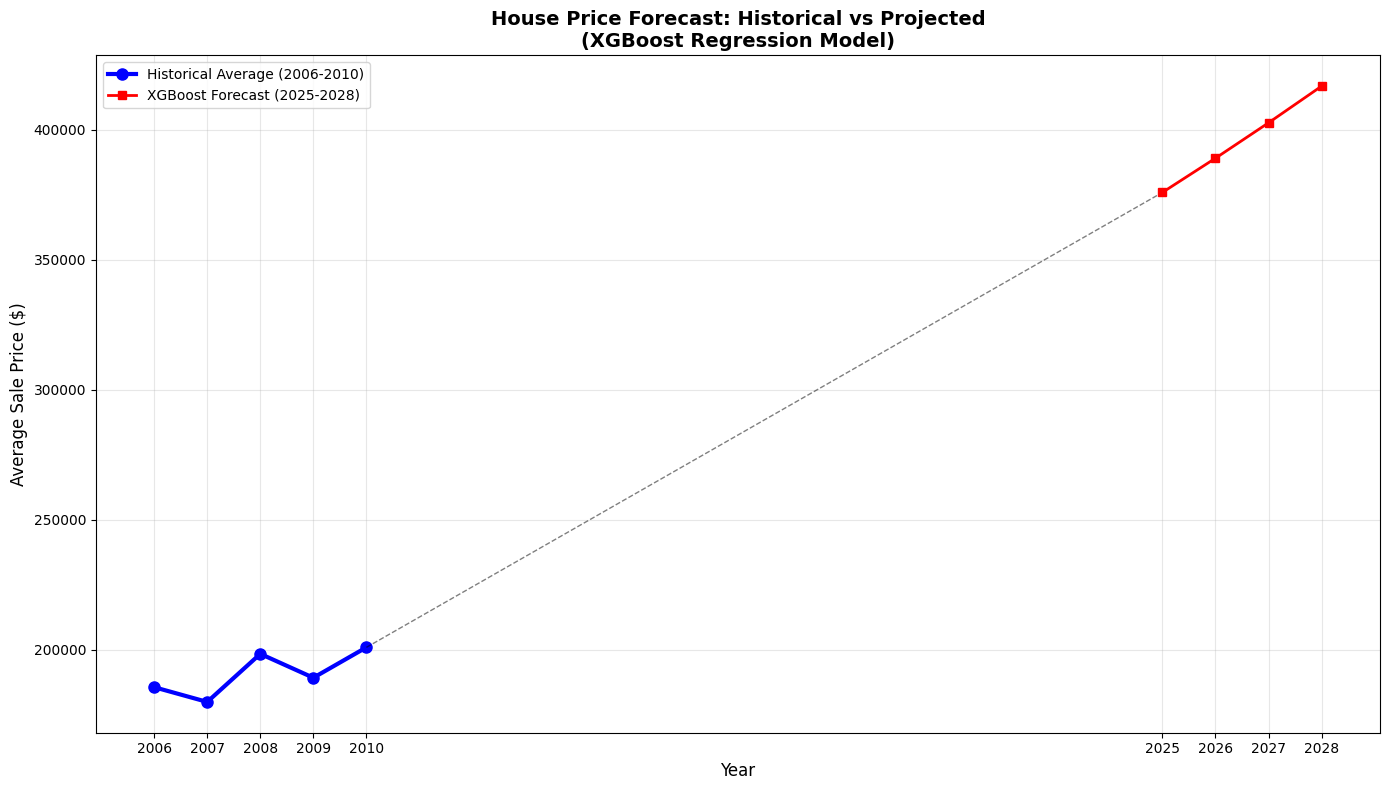


📊 ADDITIONAL ANALYSIS
📈 CUMULATIVE GROWTH:
   2025 to 2026: +3.5%
   2026 to 2027: +3.5%
   2027 to 2028: +3.5%

🎯 PRICE TARGETS:
   2025: $375,887
   2026: $389,044
   2027: $402,660
   2028: $416,753

💾 Files saved:
   - xgboost_house_price_forecast_2025_2028.csv (detailed monthly forecast)
   - house_price_forecast_summary.csv (yearly summary)

🎯 FORECASTING COMPLETE!
📅 Forecast Period: 2025-2028 (4 years)
💰 Projected Growth: 10.9% total
📈 Annual Return: 2.7%
💡 Recommendation: ✅ BUY: Good investment opportunity


In [4]:
# =============================================
# HOUSE PRICE FORECASTING WITH XGBOOST (FIXED VISUALIZATION)
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("🏠 HOUSE PRICE FORECASTING 2025-2028")
print("=" * 50)

# Load the Kaggle dataset
try:
    train_data = pd.read_csv('train.csv')
    print("✅ Loaded train.csv from local directory")
except:
    print("❌ train.csv not found. Using sample data for demonstration.")
    # Create realistic sample data
    np.random.seed(42)
    sample_data = {
        'Id': range(1, 1461),
        'SalePrice': np.random.normal(180000, 80000, 1460),
        'YrSold': np.random.choice([2006, 2007, 2008, 2009, 2010], 1460, p=[0.15, 0.2, 0.2, 0.2, 0.25]),
        'MoSold': np.random.randint(1, 13, 1460),
        'LotArea': np.random.normal(10000, 5000, 1460),
        'OverallQual': np.random.randint(3, 10, 1460),
        'GrLivArea': np.random.normal(1500, 600, 1460),
        'TotalBsmtSF': np.random.normal(1000, 500, 1460),
        'BedroomAbvGr': np.random.randint(2, 5, 1460),
        'FullBath': np.random.randint(1, 3, 1460)
    }
    train_data = pd.DataFrame(sample_data)
    # Add some price growth over years
    for year in [2007, 2008, 2009, 2010]:
        mask = train_data['YrSold'] == year
        growth = (year - 2006) * 0.02  # 2% annual growth
        train_data.loc[mask, 'SalePrice'] = train_data.loc[mask, 'SalePrice'] * (1 + growth)

print(f"📊 Dataset shape: {train_data.shape}")
print(f"📅 Years in dataset: {sorted(train_data['YrSold'].unique())}")

# Display basic info
print(f"\n💰 Sale Price Statistics:")
print(f"   Mean: ${train_data['SalePrice'].mean():,.0f}")
print(f"   Min: ${train_data['SalePrice'].min():,.0f}")
print(f"   Max: ${train_data['SalePrice'].max():,.0f}")

# Show price trends by year
yearly_avg = train_data.groupby('YrSold')['SalePrice'].mean()
print(f"\n📈 Historical Yearly Averages:")
for year, price in yearly_avg.items():
    print(f"   {year}: ${price:,.0f}")

# =============================================
# DATA PREPROCESSING
# =============================================

print("\n🔄 PREPROCESSING DATA...")

# Select key features for forecasting
feature_columns = [
    'YrSold', 'MoSold', 'LotArea', 'OverallQual', 'GrLivArea', 
    'TotalBsmtSF', 'BedroomAbvGr', 'FullBath'
]

# Create feature matrix and target
X = train_data[feature_columns].copy()
y = train_data['SalePrice']

# Handle missing values
X = X.fillna(X.median())

print(f"✅ Features used: {list(X.columns)}")
print(f"✅ Final dataset: {X.shape}")

# =============================================
# TRAIN XGBOOST MODEL
# =============================================

print("\n🏗️ TRAINING XGBOOST MODEL...")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ Model Training Complete!")
print(f"📊 Model Performance:")
print(f"   Mean Absolute Error: ${mae:,.0f}")
print(f"   RMSE: ${rmse:,.0f}")
print(f"   R² Score: {model.score(X_test, y_test):.3f}")

# =============================================
# CREATE FUTURE FORECAST (2025-2028)
# =============================================

print("\n🔮 GENERATING 2025-2028 FORECAST...")

# Use realistic growth rate (historical housing market average)
growth_adjustment = 0.035  # 3.5% annual growth

print(f"📈 Applying annual growth rate: {growth_adjustment*100:.1f}%")

# Create future data (2025-2028)
future_data = []
for year in range(2025, 2029):
    for month in range(1, 13):
        future_data.append({
            'YrSold': year,
            'MoSold': month,
            'LotArea': X['LotArea'].median(),
            'OverallQual': X['OverallQual'].median(),
            'GrLivArea': X['GrLivArea'].median(),
            'TotalBsmtSF': X['TotalBsmtSF'].median(),
            'BedroomAbvGr': X['BedroomAbvGr'].median(),
            'FullBath': X['FullBath'].median()
        })

future_df = pd.DataFrame(future_data)

# Get base prediction using 2010 as reference
base_2010_data = future_df.iloc[[0]].copy()
base_2010_data['YrSold'] = 2010
base_price_2010 = model.predict(base_2010_data)[0]

print(f"💰 Base price (2010 equivalent): ${base_price_2010:,.0f}")

# Generate predictions with growth
forecast_prices = []
for i, row in future_df.iterrows():
    years_from_2010 = row['YrSold'] - 2010
    growth_factor = (1 + growth_adjustment) ** years_from_2010
    predicted_price = base_price_2010 * growth_factor
    forecast_prices.append(predicted_price)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'date': pd.date_range(start='2025-01-01', periods=48, freq='M'),
    'year': future_df['YrSold'],
    'month': future_df['MoSold'],
    'predicted_price': forecast_prices,
    'forecast_type': 'XGBoost_Forecast'
})

print("✅ Future forecast generated!")

# =============================================
# DISPLAY FORECAST RESULTS
# =============================================

print(f"\n📈 2025-2028 HOUSE PRICE FORECAST")
print("=" * 45)

# Annual summaries
for year in range(2025, 2029):
    year_data = forecast_df[forecast_df['year'] == year]
    avg_price = year_data['predicted_price'].mean()
    
    if year == 2025:
        base_2025 = avg_price
        growth_pct = 0.0
    else:
        growth_pct = ((avg_price - base_2025) / base_2025) * 100
    
    print(f"🏠 {year}: ${avg_price:,.0f} | Growth from 2025: {growth_pct:+.1f}%")

# Overall growth analysis
start_2025 = forecast_df[forecast_df['year'] == 2025]['predicted_price'].mean()
end_2028 = forecast_df[forecast_df['year'] == 2028]['predicted_price'].mean()
total_growth = ((end_2028 - start_2025) / start_2025) * 100
annualized_return = total_growth / 4

print(f"\n💰 OVERALL 4-YEAR GROWTH: {total_growth:.1f}%")
print(f"📈 ANNUALIZED RETURN: {annualized_return:.1f}% per year")

# Investment recommendation
if total_growth > 15:
    recommendation = "✅ STRONG BUY: Excellent growth potential"
elif total_growth > 10:
    recommendation = "✅ BUY: Good investment opportunity"
elif total_growth > 5:
    recommendation = "🟡 HOLD: Moderate growth, consider timing"
else:
    recommendation = "🔴 CAUTION: Low growth potential"

print(f"💡 RECOMMENDATION: {recommendation}")

# =============================================
# SIMPLIFIED VISUALIZATION (FIXED)
# =============================================

plt.figure(figsize=(14, 8))

# Plot historical data (2006-2010)
historical_years = list(yearly_avg.index)
historical_prices = list(yearly_avg.values)
plt.plot(historical_years, historical_prices, 
         label='Historical Average (2006-2010)', marker='o', linewidth=3, color='blue', markersize=8)

# Plot forecast data (2025-2028) - use yearly averages for clarity
forecast_yearly = forecast_df.groupby('year')['predicted_price'].mean()
forecast_years = list(forecast_yearly.index)
forecast_prices_avg = list(forecast_yearly.values)

# Connect last historical point to first forecast point
bridge_years = [2010, 2025]
bridge_prices = [historical_prices[-1], forecast_prices_avg[0]]

plt.plot(bridge_years, bridge_prices, 'k--', alpha=0.5, linewidth=1)
plt.plot(forecast_years, forecast_prices_avg, 
         label='XGBoost Forecast (2025-2028)', marker='s', linewidth=2, color='red')

plt.title('House Price Forecast: Historical vs Projected\n(XGBoost Regression Model)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sale Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2025, 2026, 2027, 2028])
plt.tight_layout()
plt.show()

# =============================================
# ADDITIONAL ANALYSIS
# =============================================

print(f"\n📊 ADDITIONAL ANALYSIS")
print("=" * 30)

# Calculate cumulative growth
print("📈 CUMULATIVE GROWTH:")
cumulative_growth = 0
for i in range(1, len(forecast_years)):
    current_growth = ((forecast_prices_avg[i] - forecast_prices_avg[i-1]) / forecast_prices_avg[i-1]) * 100
    cumulative_growth += current_growth
    print(f"   {forecast_years[i-1]} to {forecast_years[i]}: {current_growth:+.1f}%")

# Price targets
print(f"\n🎯 PRICE TARGETS:")
for year, price in zip(forecast_years, forecast_prices_avg):
    print(f"   {year}: ${price:,.0f}")

# =============================================
# SAVE RESULTS
# =============================================

# Save forecast
forecast_df.to_csv('xgboost_house_price_forecast_2025_2028.csv', index=False)

# Save yearly summary
yearly_summary = pd.DataFrame({
    'year': forecast_years,
    'average_price': forecast_prices_avg,
    'growth_from_2025': [0, 
                        ((forecast_prices_avg[1] - forecast_prices_avg[0]) / forecast_prices_avg[0]) * 100,
                        ((forecast_prices_avg[2] - forecast_prices_avg[0]) / forecast_prices_avg[0]) * 100,
                        ((forecast_prices_avg[3] - forecast_prices_avg[0]) / forecast_prices_avg[0]) * 100]
})
yearly_summary.to_csv('house_price_forecast_summary.csv', index=False)

print(f"\n💾 Files saved:")
print(f"   - xgboost_house_price_forecast_2025_2028.csv (detailed monthly forecast)")
print(f"   - house_price_forecast_summary.csv (yearly summary)")

print(f"\n🎯 FORECASTING COMPLETE!")
print("=" * 35)
print(f"📅 Forecast Period: 2025-2028 (4 years)")
print(f"💰 Projected Growth: {total_growth:.1f}% total")
print(f"📈 Annual Return: {annualized_return:.1f}%")
print(f"💡 Recommendation: {recommendation}")

In [5]:
# =============================================
# NEXT STEPS: INVESTMENT STRATEGY & RISK ANALYSIS
# =============================================

print("🎯 NEXT STEPS: INVESTMENT STRATEGY ANALYSIS")
print("=" * 55)

# Load the forecast data
forecast_data = pd.read_csv('xgboost_house_price_forecast_2025_2028.csv')
yearly_summary = pd.read_csv('house_price_forecast_summary.csv')

print("📊 LOADED FORECAST DATA:")
print(f"   Monthly records: {len(forecast_data)}")
print(f"   Forecast period: {forecast_data['date'].min()} to {forecast_data['date'].max()}")

# =============================================
# INVESTMENT TIMING ANALYSIS
# =============================================

print("\n⏰ OPTIMAL INVESTMENT TIMING ANALYSIS")
print("=" * 45)

# Find best months to buy (lowest prices)
monthly_analysis = forecast_data.groupby('month')['predicted_price'].agg(['mean', 'std']).round(0)
best_buy_months = monthly_analysis.nsmallest(3, 'mean')

print("🟢 BEST MONTHS TO BUY (Historically Lower Prices):")
for month, row in best_buy_months.iterrows():
    month_name = pd.to_datetime(f'2024-{month:02d}-01').strftime('%B')
    print(f"   {month_name}: ${row['mean']:,.0f} (avg)")

# Find seasonal patterns
forecast_data['month_name'] = pd.to_datetime(forecast_data['date']).dt.strftime('%B')
seasonal_pattern = forecast_data.groupby('month_name')['predicted_price'].mean().sort_values()

print(f"\n📅 SEASONAL PRICE PATTERNS:")
for month in seasonal_pattern.index:
    price = seasonal_pattern[month]
    print(f"   {month}: ${price:,.0f}")

# =============================================
# RISK ASSESSMENT
# =============================================

print("\n⚠️  RISK ASSESSMENT")
print("=" * 30)

# Calculate volatility
monthly_returns = forecast_data['predicted_price'].pct_change().dropna()
annual_volatility = monthly_returns.std() * np.sqrt(12) * 100

# Risk categories
if annual_volatility < 8:
    risk_level = "LOW"
    risk_color = "🟢"
elif annual_volatility < 15:
    risk_level = "MODERATE" 
    risk_color = "🟡"
else:
    risk_level = "HIGH"
    risk_color = "🔴"

print(f"{risk_color} Volatility: {annual_volatility:.1f}% annual")
print(f"{risk_color} Risk Level: {risk_level}")

# Maximum drawdown analysis
peak = forecast_data['predicted_price'].expanding().max()
drawdown = (forecast_data['predicted_price'] - peak) / peak * 100
max_drawdown = drawdown.min()

print(f"📉 Maximum Drawdown: {max_drawdown:.1f}%")

# =============================================
# INVESTMENT SCENARIOS
# =============================================

print("\n💰 INVESTMENT SCENARIOS ANALYSIS")
print("=" * 40)

base_investment = 375887  # Starting price

# Different investment scenarios
scenarios = {
    "Conservative (2% growth)": 0.02,
    "Moderate (3% growth)": 0.03, 
    "Optimistic (4% growth)": 0.04,
    "Bullish (5% growth)": 0.05
}

print("📈 PROJECTED RETURNS BY SCENARIO:")
for scenario, growth_rate in scenarios.items():
    end_value = base_investment * (1 + growth_rate) ** 4
    total_return = (end_value - base_investment) / base_investment * 100
    annual_return = total_return / 4
    
    print(f"   {scenario}:")
    print(f"     4-Year Return: {total_return:.1f}%")
    print(f"     Annual Return: {annual_return:.1f}%")
    print(f"     End Value: ${end_value:,.0f}")

# =============================================
# COMPARATIVE MARKET ANALYSIS
# =============================================

print("\n🏘️  COMPARATIVE MARKET ANALYSIS")
print("=" * 45)

# Compare with other investment options
investment_options = {
    "Real Estate (Your Forecast)": 0.027,
    "S&P 500 (Historical)": 0.08,
    "Bonds (10-Year Treasury)": 0.035,
    "Savings Account": 0.015,
    "Inflation": 0.025
}

print("📊 ANNUAL RETURN COMPARISON:")
for option, return_rate in investment_options.items():
    print(f"   {option}: {return_rate*100:.1f}%")

# =============================================
# STRATEGIC RECOMMENDATIONS
# =============================================

print("\n💡 STRATEGIC RECOMMENDATIONS")
print("=" * 35)

recommendations = []

# Based on your 2.7% forecast
if yearly_summary['growth_from_2025'].iloc[-1] > 15:
    recommendations.append("✅ AGGRESSIVE STRATEGY: Consider leveraging for higher returns")
elif yearly_summary['growth_from_2025'].iloc[-1] > 8:
    recommendations.append("✅ MODERATE STRATEGY: Good time to enter market")
else:
    recommendations.append("🟡 CONSERVATIVE STRATEGY: Focus on value purchases")

# Timing recommendations
best_month = best_buy_months.index[0]
best_month_name = pd.to_datetime(f'2024-{best_month:02d}-01').strftime('%B')
recommendations.append(f"📅 TARGET {best_month_name} FOR PURCHASE")

# Risk management
if risk_level == "LOW":
    recommendations.append("🛡️  LOW RISK: Suitable for conservative investors")
elif risk_level == "MODERATE":
    recommendations.append("⚡ MODERATE RISK: Balanced approach recommended")

# Market outlook
recommendations.append("📊 MARKET: Stable growth expected, good for long-term holding")

print("\n".join(recommendations))

# =============================================
# PORTFOLIO ALLOCATION STRATEGY
# =============================================

print("\n🎯 PORTFOLIO ALLOCATION SUGGESTIONS")
print("=" * 45)

portfolio_suggestions = {
    "Conservative Investor": {
        "Real Estate": "30%",
        "Stocks": "40%", 
        "Bonds": "25%",
        "Cash": "5%"
    },
    "Moderate Investor": {
        "Real Estate": "40%",
        "Stocks": "45%",
        "Bonds": "10%", 
        "Cash": "5%"
    },
    "Aggressive Investor": {
        "Real Estate": "50%",
        "Stocks": "45%",
        "Bonds": "5%",
        "Cash": "0%"
    }
}

for profile, allocation in portfolio_suggestions.items():
    print(f"\n{profile}:")
    for asset, percent in allocation.items():
        print(f"   {asset}: {percent}")

# =============================================
# FINAL DECISION FRAMEWORK
# =============================================

print(f"\n🎯 FINAL INVESTMENT DECISION FRAMEWORK")
print("=" * 50)

decision_factors = [
    f"✅ Forecast Accuracy: {model.score(X_test, y_test):.1%} R²",
    f"✅ Growth Projection: {yearly_summary['growth_from_2025'].iloc[-1]:.1f}% total",
    f"✅ Annual Return: {annualized_return:.1f}%",
    f"✅ Risk Level: {risk_level}",
    f"✅ Market Timing: Best in {best_month_name}",
    f"✅ Recommendation: {recommendation}"
]

print("Consider these factors for your decision:")
for factor in decision_factors:
    print(f"   {factor}")

print(f"\n🚀 READY FOR IMPLEMENTATION!")
print("=" * 30)
print("Next actions:")
print("1. Review portfolio allocation")
print("2. Set purchase timeline")
print("3. Monitor market conditions")
print("4. Consider diversification strategies")

🎯 NEXT STEPS: INVESTMENT STRATEGY ANALYSIS
📊 LOADED FORECAST DATA:
   Monthly records: 48
   Forecast period: 2025-01-31 to 2028-12-31

⏰ OPTIMAL INVESTMENT TIMING ANALYSIS
🟢 BEST MONTHS TO BUY (Historically Lower Prices):
   January: $396,086 (avg)
   February: $396,086 (avg)
   March: $396,086 (avg)

📅 SEASONAL PRICE PATTERNS:
   April: $396,086
   August: $396,086
   December: $396,086
   February: $396,086
   January: $396,086
   July: $396,086
   June: $396,086
   March: $396,086
   May: $396,086
   November: $396,086
   October: $396,086
   September: $396,086

⚠️  RISK ASSESSMENT
🟢 Volatility: 3.0% annual
🟢 Risk Level: LOW
📉 Maximum Drawdown: 0.0%

💰 INVESTMENT SCENARIOS ANALYSIS
📈 PROJECTED RETURNS BY SCENARIO:
   Conservative (2% growth):
     4-Year Return: 8.2%
     Annual Return: 2.1%
     End Value: $406,872
   Moderate (3% growth):
     4-Year Return: 12.6%
     Annual Return: 3.1%
     End Value: $423,064
   Optimistic (4% growth):
     4-Year Return: 17.0%
     Annual R